In [ ]:
%pip install fenwick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import timeit
import math
import random
plt.rcParams['figure.figsize'] = [10, 6] # set size of plot
#Draw runtime plot by: https://betterprogramming.pub/3-algorithm-runtimes-visualized-with-python-e51441827917?gi=b960d46594d9

In [ ]:
# Python implementation of Segment Tree
# source code by: https://github.com/TheAlgorithms/Python/blob/master/data_structures/binary_tree/non_recursive_segment_tree.py
from __future__ import annotations
from collections.abc import Callable
from typing import Any, Generic, TypeVar
T = TypeVar("T")
class SegmentTree(Generic[T]):
    def __init__(self, arr: list[T], fnc: Callable[[T, T], T]) -> None:
        any_type: Any | T = None
        self.N: int = len(arr)
        self.st: list[T] = [any_type for _ in range(self.N)] + arr
        self.fn = fnc
        self.build()

    def build(self) -> None:
        for p in range(self.N - 1, 0, -1):
            self.st[p] = self.fn(self.st[p * 2], self.st[p * 2 + 1])

    def update(self, p: int, v: T) -> None:
        p += self.N
        self.st[p] = v
        while p > 1:
            p = p // 2
            self.st[p] = self.fn(self.st[p * 2], self.st[p * 2 + 1])

    def query(self, l: int, r: int) -> T | None:  # noqa: E741
        l, r = l + self.N, r + self.N
        res: T | None = None
        while l <= r:
            if l % 2 == 1:
                res = self.st[l] if res is None else self.fn(res, self.st[l])
            if r % 2 == 0:
                res = self.st[r] if res is None else self.fn(res, self.st[r])
            l, r = (l + 1) // 2, (r - 1) // 2
        return res

In [ ]:
from __future__ import print_function
from fenwick import FenwickTree
# Reference: https://github.com/dstein64/fenwick

(0.0, 10000.0, 0.0, 0.5)

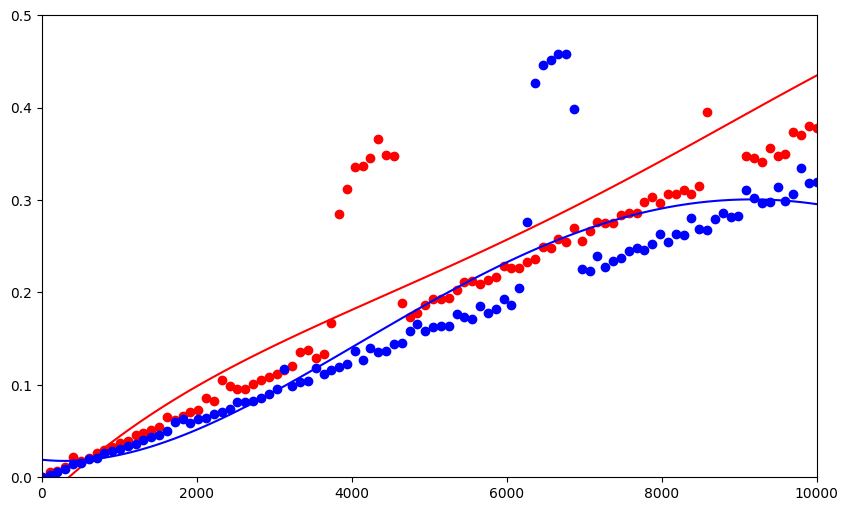

In [ ]:
# Fenwick vs Segment tree initialization runtime comparison
# This graph show initialize time vs size of base array
# The line showing average time 

# Red plots - Fenwick Tree
lst = list(range(10000))
ns = np.linspace(0, 10000, 100, dtype=int)
ts = [timeit.timeit('fenwick_tree = FenwickTree(len(lst)); fenwick_tree.init(lst)', 
                    setup='lst=list(range({})); random.shuffle(lst)'.format(n),
                    globals=globals(),
                    number=100)
      for n in ns]
plt.plot(ns, ts, 'or')
degree = 4
coeffs = np.polyfit(ns, ts, degree)
p = np.poly1d(coeffs)
plt.plot(ns, [p(n) for n in ns], '-r')


# Blue plots - Segment Tree 
ts = [timeit.timeit('SegmentTree(lst, lambda a, b: a + b)', 
                    setup='lst=list(range({})); random.shuffle(lst)'.format(n),
                    globals=globals(),
                    number=100)
      for n in ns]
plt.plot(ns, ts, 'ob')
degree = 4
coeffs = np.polyfit(ns, ts, degree)
p = np.poly1d(coeffs)
plt.plot(ns, [p(n) for n in ns], '-b')
plt.axis([0, 10000, 0, 0.5])

(0.0, 10000.0, 0.0, 0.0006)

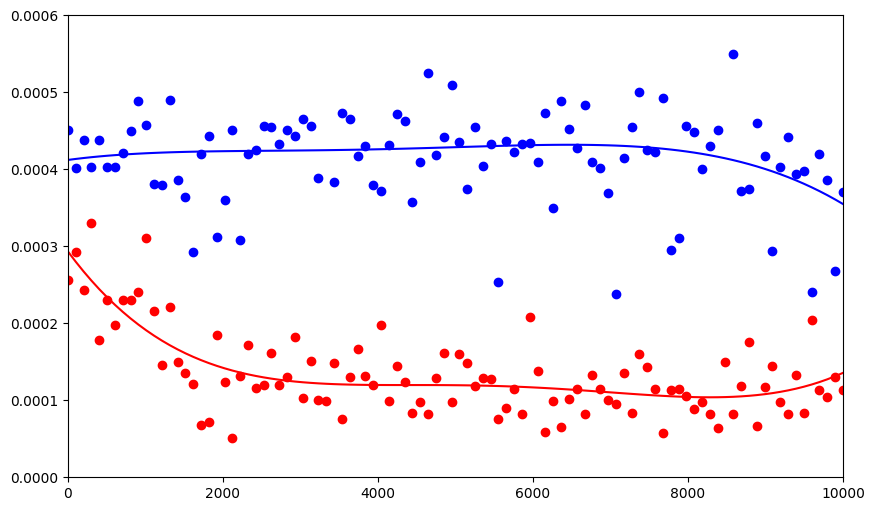

In [ ]:
# Fenwick vs segment tree point query runtime comparison
# This graph show point query time vs index 
# The line show average time to point query

# Red plots - Fenwick tree
fenwick_tree = FenwickTree(len(lst))
fenwick_tree.init(lst)
ns = np.linspace(0, 10000, 100, dtype=int)
ts = [timeit.timeit('fenwick_tree.prefix_sum(x)', 
                    setup='x = random.randint(0, len(fenwick_tree))'.format(n),
                    globals=globals(),
                    number=100)
      for n in ns]
plt.plot(ns, ts, 'or')
degree = 4
coeffs = np.polyfit(ns, ts, degree)
p = np.poly1d(coeffs)
plt.plot(ns, [p(n) for n in ns], '-r')


# Blue plots - Segment tree
segment_tree = SegmentTree(lst, lambda a, b: a + b)
ts = [timeit.timeit('segment_tree.query(0, x)', 
                    setup='x = random.randint(0, len(lst))'.format(n),
                    globals=globals(),
                    number=100)
      for n in ns]
plt.plot(ns, ts, 'ob')
degree = 4
coeffs = np.polyfit(ns, ts, degree)
p = np.poly1d(coeffs)
plt.plot(ns, [p(n) for n in ns], '-b')
plt.axis([0, 10000, 0, 0.0006])

(0.0, 10000.0, 0.0, 0.0015)

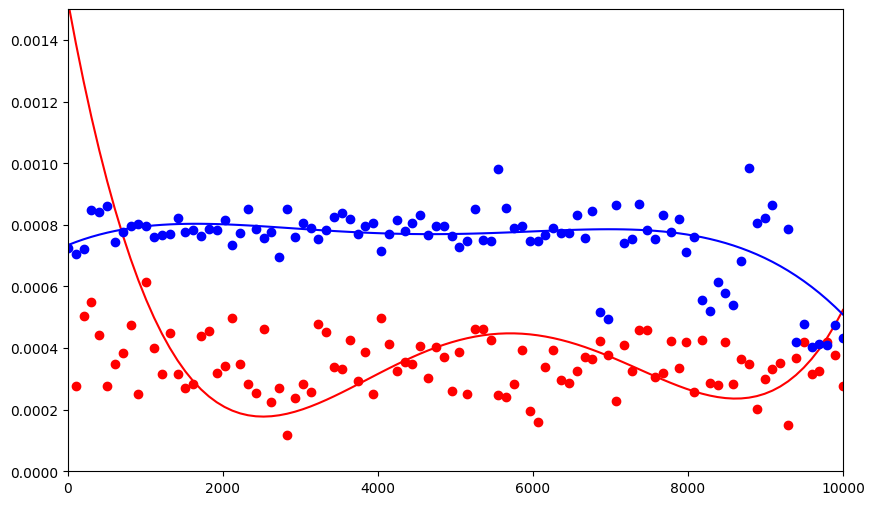

In [ ]:
# Fenwick vs segment tree point update runtime comparison
# This graph show point update time vs index 
# The line show average time to point update

# Red plots - Fenwick tree
ns = np.linspace(0, 10000, 100, dtype=int)
ts = [timeit.timeit('fenwick_tree.add(x, 10000)', 
                    setup='x = random.randint(0, len(fenwick_tree))'.format(n),
                    globals=globals(),
                    number=100)
      for n in ns]
plt.plot(ns, ts, 'or')
degree = 4
coeffs = np.polyfit(ns, ts, degree)
p = np.poly1d(coeffs)
plt.plot(ns, [p(n) for n in ns], '-r')


# Blue plots - Segment tree
segment_tree = SegmentTree(lst, lambda a, b: a + b)
ts = [timeit.timeit('segment_tree.update(x, 10000)', 
                    setup='x = random.randint(0, len(lst))'.format(n),
                    globals=globals(),
                    number=100)
      for n in ns]
plt.plot(ns, ts, 'ob')
degree = 4
coeffs = np.polyfit(ns, ts, degree)
p = np.poly1d(coeffs)
plt.plot(ns, [p(n) for n in ns], '-b')
plt.axis([0, 10000, 0, 0.0015])